# 小麦とチェス盤問題

##  少ないマスで考える

In [5]:
import numpy as np

n_squares = 4
small_board_list = [1]

for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])

print("４マスの板に小麦を並べる（リスト）:{}".format(small_board_list))


small_board_ndarray = np.array(small_board_list)

print("４マスの板に小麦を並べる（ndarray）:{}".format(small_board_ndarray))

４マスの板に小麦を並べる（リスト）:[1, 2, 4, 8]
４マスの板に小麦を並べる（ndarray）:[1 2 4 8]


### 【問題1】2×2マスのチェス盤の小麦の数

In [8]:
board2_2array = small_board_ndarray.reshape(2,2)
print(board2_2array)
print(board2_2array.shape)

[[1 2]
 [4 8]]
(2, 2)


## 8×8マスのチェス盤

### 【問題2】n×mマスへの拡張

In [90]:
#関数は(n,m)が引数 :n*mマスの盤
# returnは、n*mマスの盤の１＊{２＊＊(n＊m)}のarray

def chessboard_1(n,m): #n*mのチェス盤
    grains = 1
    count = 1
    board_list  = [1]
    
    number_of_boxes = n * m
   
    if number_of_boxes < 1: #マスの数が１より小さい時False
        return False
    
    elif type(number_of_boxes) == float: #nとmが整数じゃない時False
        return False
    
    else:
        for i in range(number_of_boxes - 1):
            board_list.append (2 * board_list[-1])
            
        #print("n*mマスの板に小麦を並べる（リスト）:{}".format(board_list))
        
        board_ndarray = np.array(board_list)
        
        #print("n*mマスの板に小麦を並べる（ndarray）:{}".format(board_ndarray))
        
        board_n_m_array = board_ndarray.reshape(n, m)
            
    return board_n_m_array, board_n_m_array.shape #配列とその形を返す


print(chessboard_1 (8, 8))
            
        

(array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
       [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3

### 【問題3】小麦の数の合計

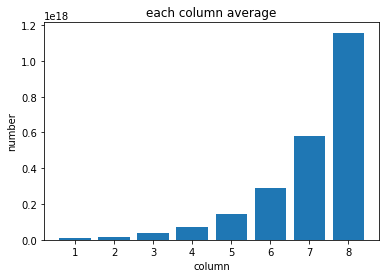

8*8マスのチェス盤の小麦の合計は:1.8446744073709552e+19


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


board_n_m_array, _ = chessboard(8, 8) #8*8マスの配列を取り出す
total_grains = board_n_m_array.sum() #合計
mean_grains = board_n_m_array.mean(axis = 0) #列ごとの平均（要素数８）

plt.xlabel("column")
plt.ylabel("number")
plt.title("each column average")
plt.bar(np.arange(1,9), mean_grains)
plt.show()

print("8*8マスのチェス盤の小麦の合計は:{}".format(total_grains))

### 【問題4】小麦の数のヒートマップ

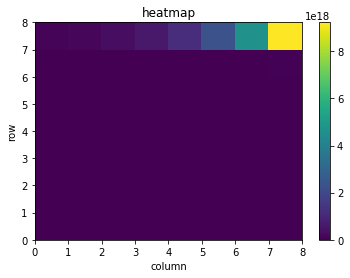

In [63]:
board_n_m_array, _ = chessboard(8, 8)

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_n_m_array)　#右上ほど数が大きくなり、黄色くなる
plt.colorbar()
plt.show()

## チェス盤の後半

### 【問題5】後半は前半の何倍か

In [72]:
array0_3 = board_n_m_array[0:4].sum()
array4_7 = board_n_m_array[4:8].sum()

print(array0_3)
print(array4_7)

quotient = array4_7 /array0_3
print("後半の行は前半の{}倍".format(quotient))

4294967295.0
1.8446744069414584e+19
後半の行は前半の4294967296.0倍


## 他の計算方法

### 【問題6】他の計算方法によるn×mマスへの拡張

#### 「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったもので作る

In [91]:
def chessboard_2(n, m):
    n_squares = n*m
    board_ndarray = np.array([1]).astype(np.uint64)

    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
    
    board_ndarray = board_ndarray.reshape(n, m)
    return("n*mマスの板に小麦を並べる（ndarray）：{}".format(board_ndarray))

print(chessboard_2(8, 8))

n*mマスの板に小麦を並べる（ndarray）：[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168

#### ブロードキャストを使ったもので作る

In [92]:
def chessboard_3(n, m):
    n_squares = n*m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    
    return("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

print(chessboard_3(8, 8))

最後のマスの小麦の数：9223372036854775808


### 【問題7】計算時間の比較

In [97]:
%%timeit

chessboard_1(8, 8)

19 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [100]:
chessboard_1(8, 8)

(array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
         1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
        [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
         4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
        [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
         1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
        [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
         2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
        [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
         6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
        [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
         1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
        [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
         4.50359963e+15, 9.00719925e+15, 1.80

In [98]:
%%timeit

chessboard_2(8, 8)

1.11 ms ± 95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [101]:
chessboard_2(8, 8)

'n*mマスの板に小麦を並べる（ndarray）：[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00\n  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]\n [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03\n  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]\n [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05\n  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]\n [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08\n  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]\n [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10\n  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]\n [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12\n  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]\n [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15\n  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]\n [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17\n  1.15292150e+18 2.3058

In [99]:
%%timeit

chessboard_3(8, 8)

5.07 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [102]:
chessboard_3(8, 8)

'最後のマスの小麦の数：9223372036854775808'